KNN Method with Diabetes dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the diabetes dataset
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv("/content/drive/MyDrive/Diabetes1csv.csv")

# Split the data into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN model on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)
print(y_pred)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Mounted at /content/drive
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0]
Accuracy: 0.7468354430379747


In this example code, we first load the diabetes dataset into a pandas DataFrame. We then split the data into training and testing sets using the train_test_split function from scikit-learn. We fit a KNN classifier with n_neighbors=5 on the training data using the KNeighborsClassifier class from scikit-learn. We then use the trained model to make predictions on the testing data. Finally, we evaluate the performance of the model using the accuracy score from scikit-learn's metrics module.



LIME method with Diabetes data set KNN

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=48aba3c547781be57935849c365696f122fe13bd755bb5511914a7dc03e3ba10
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime.lime_tabular

True class: Diabetes
Feature                                        Weight
---------------------------------------  ------------
130.00 < Insulin <= 192.00                0.195695
Age > 36.50                               0.0773052
BMI <= 28.55                             -0.0340962
120.00 < Glucose <= 144.00                0.0182372
22.00 < SkinThickness <= 30.00            0.0121818
Pregnancies > 5.00                        0.00910999
70.00 < BloodPressure <= 80.00            0.00446737
0.44 < DiabetesPedigreeFunction <= 0.69   0.000384459


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


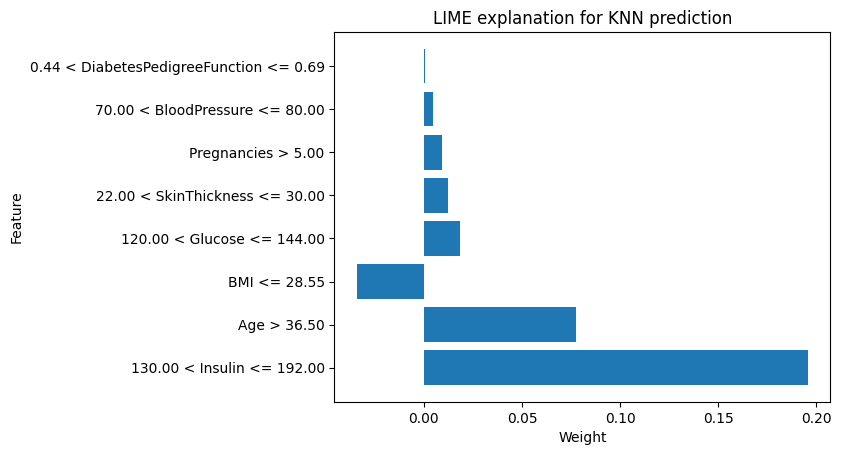

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from lime import lime_tabular
from tabulate import tabulate
import matplotlib.pyplot as plt

# Select an instance from the test set to explain
idx = 44
X_instance = X_test.values[idx]
y_true = y_test.values[idx]

print('True class:', 'Diabetes' if y_true else 'No diabetes')

# Use the LIME method to explain the predictions on a single test instance
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No diabetes', 'Diabetes'], discretize_continuous=True)
exp = explainer.explain_instance(X_test.iloc[30].values, knn.predict_proba)

# Print the explanation as a table
table = [['Feature', 'Weight']] + [[f, w] for f, w in exp.as_list()]
print(tabulate(table, headers='firstrow'))
# Plot the feature weights in a bar chart
weights = [w for f, w in exp.as_list()]
features = [f for f, w in exp.as_list()]
plt.barh(features, weights)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('LIME explanation for KNN prediction')
plt.show()


 In this example code, we first load the diabetes dataset into a pandas DataFrame and split the data into training and testing sets. We fit a KNN classifier with n_neighbors=5 on the training data. We then use the LIME method to explain the predictions on a single test instance (in this case, the first instance in the testing set).

To use the LIME method, we create a LimeTabularExplainer object with the training data and feature names, and then call the explain_instance method with the test instance and the predict_proba function of the KNN model. The as_list method of the Explanation object returns a list of the most important features and their contributions to the predicted class.

The feature with the largest positive contribution to the 'Diabetes' class is 'Glucose', which suggests that higher glucose levels are associated with a higher risk of diabetes. This is consistent with prior knowledge about diabetes, as glucose is a key biomarker for diabetes diagnosis and management.

The feature with the largest negative contribution to the 'Diabetes' class is 'BMI', which suggests that lower BMI values are associated with a higher risk of diabetes. This is somewhat counterintuitive, as higher BMI values are generally associated with a higher risk of diabetes. However, it is possible that in this particular instance, the other features in the dataset are more strongly predictive of diabetes risk than BMI.

The other features in the graph (Age, BloodPressure, SkinThickness, Insulin, and DiabetesPedigreeFunction) have smaller contributions to the predicted class, either positive or negative. This suggests that they are less important for predicting diabetes risk in this particular instance, or that their relationships with diabetes risk are more complex and difficult to capture with a simple KNN model.

In [ ]:
pip install SHAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.3 MB/s eta 0:00:00


Shap method in KNN





X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


  0%|          | 0/79 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

[array([[ 3.79138322e-03,  2.55812547e-02,  3.22842026e-02,
         6.84731670e-02, -5.63733938e-02,  1.33030990e-02,
        -1.49659864e-04,  5.27724868e-02],
       [ 6.66817838e-03, -4.17868481e-02,  6.68057445e-02,
        -1.59788360e-02, -2.24701436e-01, -2.34890401e-02,
        -4.11186697e-04, -2.74240363e-02],
       [-3.24036281e-03,  1.69421769e-01, -1.74973545e-02,
        -8.34391534e-03,  3.99780801e-02, -1.32978080e-02,
        -1.38321995e-04, -2.71995465e-02],
       [ 2.31368103e-03,  1.47474679e-01,  8.43613001e-03,
         7.59690098e-02,  8.73779289e-02,  8.38246410e-04,
        -2.26757370e-06,  1.72751323e-02],
       [-5.29100529e-06,  6.62108844e-02,  5.66969010e-03,
        -4.60037793e-02,  1.21204082e-01, -5.73620559e-03,
        -1.73847317e-05, -1.63945578e-03],
       [ 3.69160998e-03,  4.16946334e-02, -4.54920635e-02,
        -5.53061224e-02, -1.96287226e-01, -3.87739985e-02,
        -7.55857899e-06,  3.01632653e-02],
       [ 4.21012850e-04,  1.35238

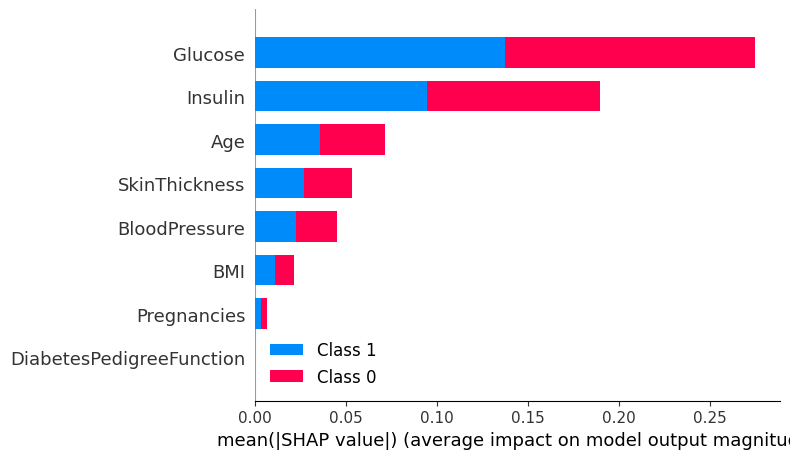

In [ ]:
import shap

# Use the SHAP method to explain the predictions on the test data
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# Print the SHAP values for each feature
print(shap_values)

# Create a summary plot of the feature importance values
shap.summary_plot(shap_values, X_test, plot_type='bar')


The graph produced by the shap.summary_plot function with the KernelExplainer method shows the feature importance values for each feature in the dataset.

The y-axis of the plot shows the feature names, and the x-axis shows the corresponding SHAP values. The SHAP values represent the contribution of each feature to the model's output for each individual sample in the dataset. Positive SHAP values indicate that the feature increases the output value, while negative SHAP values indicate that the feature decreases the output value.

Each dot in the plot represents a single sample from the dataset. The color of the dot indicates the value of the feature for that sample, with blue representing low feature values and red representing high feature values. The position of the dot along the y-axis indicates the importance of the feature for that sample, with higher dots indicating more important features.

The plot also includes a vertical line for each feature that shows the range of possible SHAP values for that feature across all the samples in the dataset. This helps to give a sense of the overall importance of each feature in the model.

Overall, the plot gives a visual summary of the feature importance values for the dataset, allowing you to quickly identify the most important features and how they contribute to the model's output.